In [15]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List

random.seed(10)

X_train_path = "data/original/solTrainXtrans.txt" #hw2/data/solTrainXtrans.txt
y_train_path = "data/original/solTrainY.txt"
X_test_path = "data/original/solTestXtrans.txt"
y_test_path = "data/original/solTestY.txt"

X_train = pd.read_csv(X_train_path, sep="\t")
y_train = pd.read_csv(y_train_path, sep="\t")
X_test = pd.read_csv(X_test_path, sep="\t")
y_test = pd.read_csv(y_test_path, sep="\t")

Passo 0 - Análise Exploratória

In [2]:
print("=========== Preditores ===========")
print(f"Número de preditores: {X_train.shape[1]}")
print(f"Shape (train): {X_train.shape}")
print(f"Shape (test): {X_test.shape}")

print("\n=========== Target ===========")
print(f"Shape (train): {y_train.shape}")
print(f"Shape (test): {y_test.shape}")

=========== Preditores ===========
Número de preditores: 228
Shape (train): (951, 228)
Shape (test): (316, 228)

=========== Target ===========
Shape (train): (951, 1)
Shape (test): (316, 1)


In [3]:
"""
As colunas [:208] são colunas binárias, portanto as métricas estatísticas já são triviais (moda, min, max e etc)
"""

X_train.iloc[:, 208:].describe()

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,5.199018,3.173918,2.548706,3.176241,3.362257,2.579057,0.925628,0.398110,1.287032,3.695596,3.323978,0.230838,0.747016,0.049753,0.090982,0.120103,0.734091,-0.452796,6.707718,7.081455
std,0.477558,0.457018,0.455234,0.488239,0.881072,1.729708,0.718728,0.382052,1.128680,1.182297,0.986043,0.273948,0.627577,0.130874,0.177213,0.194420,0.538622,1.041293,4.508620,4.672059
min,3.852061,1.791759,1.098612,1.609438,0.743492,0.000000,0.000000,0.000000,0.000000,0.000000,0.770481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.841320,0.000000,0.000000
25%,4.817086,2.890372,2.197225,2.890372,2.759228,0.798770,0.000000,0.000000,0.000000,2.886887,2.642633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250963,3.837096,4.159049
50%,5.194234,3.135494,2.564949,3.178054,3.351388,2.944766,1.098612,0.567077,1.945910,3.691453,3.317541,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,-0.363024,7.258130,7.759912
75%,5.581012,3.465736,2.890372,3.481122,4.009916,4.023747,1.497866,0.804530,1.945910,4.465209,3.862179,0.456826,1.098612,0.000000,0.000000,0.375000,1.098612,0.279867,9.853650,10.499942
max,6.502505,4.553877,3.871201,4.584967,5.977009,6.702998,2.833213,1.188042,3.258097,7.314252,6.267798,0.707935,2.639057,0.480000,0.495868,0.495868,2.079442,3.533785,23.020337,23.020337


In [4]:
X_test.iloc[:, 208:].describe()

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000,316.000000
mean,5.169620,3.143349,2.523316,3.146217,3.320868,2.661990,0.827154,0.358131,1.364523,3.622126,3.313219,0.198702,0.692059,0.032997,0.086255,0.11507,0.747348,-0.541327,6.378626,6.601308
std,0.459274,0.449112,0.440261,0.481334,0.849627,1.672107,0.701013,0.374124,1.110788,1.176129,0.957606,0.270868,0.595009,0.108418,0.176022,0.19448,0.511559,1.051516,4.263582,4.397996
min,4.044279,1.791759,1.386294,1.609438,1.228655,0.000000,0.000000,0.000000,0.000000,0.000000,0.770481,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2.870902,0.000000,0.000000
25%,4.811406,2.890372,2.197225,2.833213,2.759228,0.798770,0.000000,0.000000,0.000000,2.886887,2.642633,0.000000,0.000000,0.000000,0.000000,0.00000,0.693147,-1.263705,3.837096,3.837096
50%,5.142306,3.135494,2.484907,3.178054,3.351388,2.944766,0.693147,0.567077,1.945910,3.691453,3.110607,0.000000,0.693147,0.000000,0.000000,0.00000,0.693147,-0.481096,6.884369,6.884369
75%,5.540551,3.401197,2.833213,3.433987,3.913012,4.023747,1.386294,0.567077,2.397895,4.324656,3.862179,0.456826,1.098612,0.000000,0.000000,0.37500,1.098612,0.197730,9.506280,9.765805
max,6.173619,4.234107,3.526361,4.276666,5.294621,6.979888,2.833213,1.148118,3.332205,6.822461,5.421759,0.707935,2.302585,0.468750,0.495000,0.49500,1.945910,2.154845,18.431966,18.431966


In [5]:
# Verificação de valores NaN ou Null

print(f"Percentual de valores Nulos (treino): {(X_train.isna().sum() / X_train.shape[0])}")
print(f"Percentual de valores Nulos (teste): {X_test.isna().sum() / X_test.shape[0]}")

Percentual de valores Nulos (treino): FP001                0.0
FP002                0.0
FP003                0.0
FP004                0.0
FP005                0.0
                    ... 
NumHalogen           0.0
NumRings             0.0
HydrophilicFactor    0.0
SurfaceArea1         0.0
SurfaceArea2         0.0
Length: 228, dtype: float64
Percentual de valores Nulos (teste): FP001                0.0
FP002                0.0
FP003                0.0
FP004                0.0
FP005                0.0
                    ... 
NumHalogen           0.0
NumRings             0.0
HydrophilicFactor    0.0
SurfaceArea1         0.0
SurfaceArea2         0.0
Length: 228, dtype: float64


In [6]:
# Uma outra forma de visualizar exatamente qual coluna possui uma porcentagem de valores NaN acim de 0.0
(X_train.isna().sum() / X_train.shape[0]).where(lambda x: x > 0.0).value_counts() # Baseado no output, não se tem nenhum valor NaN
(X_test.isna().sum() / X_train.shape[0]).where(lambda x: x > 0.0).value_counts() # Baseado no output, não se tem nenhum valor NaN

Series([], Name: count, dtype: int64)

In [7]:
y_train

,x
1,-3.97
2,-3.98
3,-3.99
4,-4.00
5,-4.06
...,...
947,-1.26
948,-1.28
949,-1.30
950,-1.32


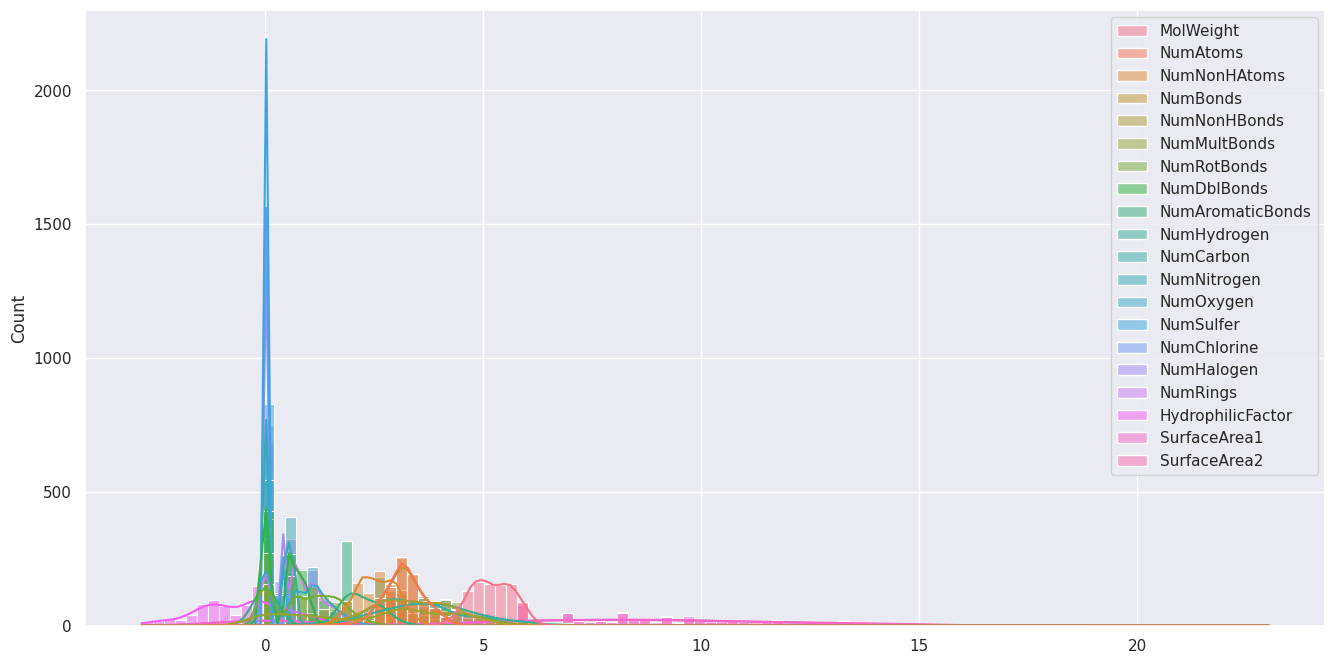

In [8]:
# Contagem dos preditores

sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 8))
sns.histplot(  
    data=X_train.iloc[:, 208:],
    kde=True,
    color='#69b3a2'
)
plt.savefig("results/0/histgram_target.png")
plt.show()

Pre-processing

In [9]:
# O primeiro passo para aplicar o PCA, é centralizar os dados
def center(X):
    return X - np.mean(X, axis=0)

# O segundo passo para aplicar o PCA, é encontrar a matriz de covariância
def mcov(X):
    # N corresponde ao número de amostras (linhas)
    # p corresponde ao número de características (colunas)
    N, p = X.shape

    # m é a média de cada coluna (característica)
    m = np.mean(X, axis=0)

    # R é a matriz de correlação
    # C é a matriz de covariância
    R = (X.T @ X)/N
    C = R - m.reshape(p,1)@m.reshape(p,1).T
    return C

# O próximo passo é calcular os autovalores e autovetores da matriz de covariância 
# Calculamos as raízes do determinante |C - λI| = 0, onde I é a matriz identidade p x p
def autovalores_autovetores (C):
    autovalores, autovetores = np.linalg.eig(C)
    return autovalores, autovetores 

 # Agora, precisamos ordenar os autovalores e autovetores

# A função esta adaptada para selecionar os N maiores autovalores e seus respectivos autovetores

def matriz_projecao(autovalores, autovetores, N_components):
    idx = autovalores.argsort()[::-1]

    autovalores = autovalores[idx]
    autovetores = autovetores[:,idx]

    V = autovetores[:,:N_components]
    return V 
 
# Algebricamente, seria necessário calcular a matriz de transformação Q = V.T, mas como estamos trabalhando com numpy, podemos usar diretamente V
# Finalmente, aplicamos a transformação PCA

def pca_transformacao(X, V):
    Y = X @ V
    return Y

In [10]:
# Agora, desenvolvemos a função completa de PCA
def pca(X, N_components):
    X = center(X)
    C = mcov(X)

    autovalores, autovetores = autovalores_autovetores(C)

    V = matriz_projecao(autovalores, autovetores, N_components)
    Y = pca_transformacao(X, V)

    return Y 

In [11]:
X_train_w_pca = pca(X_train.values, 2)
X_train_w_pca

array([[ -0.21883417,   3.90185983],
       [  6.40047466,   3.21903378],
       [  2.13432243,   0.39872384],
       ...,
       [ -2.42598461,  -3.6638057 ],
       [-10.60973619,  -2.49889764],
       [ -4.78093051,  -3.91195277]], shape=(951, 2))

In [12]:
X_test_w_pca = pca(X_test.values, 2)
X_test_w_pca

array([[-1.95106950e+00,  3.72410345e+00],
       [-4.65481641e+00,  3.97378536e+00],
       [-2.63278053e+00, -8.47615585e-01],
       [-5.79827683e-02,  3.59679861e+00],
       [-5.16957006e+00, -8.38637720e-01],
       [ 2.81802559e-02,  3.64264364e+00],
       [ 2.13424471e+00,  3.05421433e+00],
       [ 4.18860664e+00,  3.78023664e+00],
       [ 1.86601342e+00,  3.86785770e+00],
       [ 3.07087803e+00, -1.02191823e+00],
       [ 3.01262129e+00, -9.68587645e-01],
       [-2.50428803e+00,  8.15085140e-01],
       [-1.64810474e+00,  3.38466820e+00],
       [ 1.04593500e+00,  4.17919389e+00],
       [-2.31408518e+00, -1.04275934e+00],
       [-3.88356074e+00, -1.99906914e+00],
       [ 1.16589742e+00, -9.21984438e-01],
       [ 1.96471180e+00,  3.98011517e+00],
       [-3.62752324e+00, -1.92563725e-01],
       [-3.98735177e+00, -2.01702635e+00],
       [-9.57153871e+00,  3.32442225e+00],
       [ 9.79086727e-01,  3.35363636e+00],
       [ 9.71441314e-01,  4.13881168e+00],
       [-4.

In [16]:
# Save pre-processed data

x_test_df = pd.DataFrame(data=X_test_w_pca, columns=["pc1", "pc2"])
x_train_df = pd.DataFrame(data=X_train_w_pca, columns=["pc1", "pc2"])

x_test_df.to_csv("data/preprocessed/x_test.csv")
x_train_df.to_csv("data/preprocessed/x_train.csv")

Build Neural Network

In [ ]:
# Criar uma MLP
class MLPRegressor:
    def __init__(self, input_shape, hidden_shape, output_shape) -> None:
        self.input_shape = input_shape
        self.hidden_shape = hidden_shape
        self.output_shape = output_shape
        self.num_layers = len(hidden_shape) + 1

        self.rng = np.random.default_rng(2000)

        # Initialize the weights and biases for each layer using Xavier initialization
        self.weights: List[np.ndarray] = []
        self.biases: List[np.ndarray] = []

        sizes = [input_shape] + hidden_shape + [output_shape]
        for i in range(1, self.num_layers + 1):
            fan_in, fan_out = sizes[i - 1], sizes[i]
            limit = np.sqrt(6.0 / (fan_in + fan_out))
            w = self.rng.uniform(-limit, limit, size=(fan_out, fan_in)).astype(np.float32)
            b = np.zeros((fan_out, 1), dtype=np.float32)
            self.weights.append(w)
            self.biases.append(b)
    
    def forward(self, X):
        # Ensure numpy array with correct dtype
        X = np.asarray(X, dtype=np.float32)
        # Basic shape check (optional but recommended)
        if X.shape[0] != self.input_shape:
            raise ValueError(f"Expected X with shape ({self.input_shape}, m), got {X.shape}")

        # Forward pass through the network
        self.activations: List[np.ndarray] = [X]
        self.z = []

        for i in range(self.num_layers):
            #print("DEBUG - Forward section: started")
            #print(f"Shape of weights: {self.weights[i].shape}")
            #print(f"Shape of activations: {self.activations[i].shape}")
            #print(f"Shape of biases: {self.biases[i].shape}")
            #print("DEBUG - Forward section: finished")

            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = z  # Linear activation for output layer
            self.activations.append(a)
        return self.activations[-1]  # shape: (output_size, m)

    def backward(self, y):
        # Ensure numpy array
        y = np.asarray(y, dtype=np.float32)

        # Make sure y has shape (output_dim, m)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        # Number of training examples based on stored input
        m = self.activations[0].shape[1]

        # Compute gradients
        gradients = []
        dZ = self.activations[-1] - y  # shape: (output_size, m)
        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)  # shape: (sizes[i], sizes[i-1])
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # shape: (sizes[i], 1)
            gradients.append((dW, db))
            
            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)  # shape: (sizes[i-1], m)
                #a_prev = self.activations[i]
                dZ = dA * self.gradient_tanh(self.z[i-1])  # shape: (sizes[i-1], m)

        return gradients[::-1]  # Reverse the gradients

    def update_parameters(self, gradients, learning_rate):
        # Update parameters using gradients and learning rate
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    def tanh(self, Z):
        # Hyperbolic tangent (tanh) activation function
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        # Gradient of the hyperbolic tangent (tanh) activation function
        return 1 - np.tanh(Z)**2

In [ ]:
# Normalize the input data
X_train_mean = np.mean(X_train_w_pca)
X_train_std = np.std(X_train_w_pca)
X_train_mod = (X_test_w_pca - X_train_mean) / X_train_std
X_test_mod = (X_test_w_pca - X_train_mean) / X_train_std

In [ ]:
X_train.shape

In [ ]:
X_train_mod.shape

In [ ]:
X_train_w_pca.T.shape

In [ ]:
# Training parameters
num_epochs = 1000
learning_rate = 0.1

# Define the MLP model
hidden_sizes = [30, 30]
output_size = y_train.shape[1]
input_size = X_train_w_pca.shape[1]

print(f"input_size: {input_size}")
print(f"output_size: {output_size}")

In [ ]:
mlp = MLPRegressor(input_size, hidden_sizes, output_size)

In [ ]:
X_train_np = X_train_w_pca.T      # (n_features, m)
y_train_np = y_train.to_numpy(dtype=np.float32).reshape(1, -1)  # (1, m)

for epoch in range(num_epochs):
    outputs = mlp.forward(X_train_np)        # (1, m)
    gradients = mlp.backward(y_train_np)     # usa m correto
    mlp.update_parameters(gradients, learning_rate)

    diff = outputs - y_train_np
    loss = np.mean(diff ** 2)

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1} - Loss: {loss:.6f}")

In [ ]:
# Testing
test_outputs = mlp.forward(X_test_w_pca.T)
test_loss = np.mean((test_outputs - y_test.T) ** 2)
print(f"Test Loss: {test_loss}")

Gerar um gráfico de loss por época